Import library and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
auto_raw = pd.read_csv(r'Auto.csv')

In [3]:
print(auto_raw)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

Data Processing Pipeline

In [4]:
auto_processed1 = auto_raw.drop(['name'],axis = 1)

#print(auto_processed1)

In [5]:
def to_float (x):
    try:
        return (float(x))
    except:
        return x

auto_raw_tofloat = auto_processed1.applymap(to_float)

#print(auto_raw_tofloat)

In [6]:
for x in auto_raw_tofloat.index: 
    if type(auto_raw_tofloat.loc[x, "horsepower"]) == 'str':
        auto_raw_tofloat.drop(x, inplace = True)
    elif auto_raw_tofloat.loc[x, "horsepower"] == '?':
        auto_raw_tofloat.drop(x, inplace = True)

#print(auto_raw_tofloat)

In [7]:
#quadratic 1

quadratic_auto = auto_raw_tofloat.copy()

columns_to_drop = ['cylinders', 'displacement', 'weight', 'acceleration', 'year', 'origin']
quadratic_auto.drop(columns_to_drop, axis=1, inplace=True)

quadratic_auto['hp^2'] = quadratic_auto['horsepower']**2

#print(quadratic_auto)

      mpg horsepower     hp^2
0    18.0      130.0  16900.0
1    15.0      165.0  27225.0
2    18.0      150.0  22500.0
3    16.0      150.0  22500.0
4    17.0      140.0  19600.0
..    ...        ...      ...
392  27.0       86.0   7396.0
393  44.0       52.0   2704.0
394  32.0       84.0   7056.0
395  28.0       79.0   6241.0
396  31.0       82.0   6724.0

[392 rows x 3 columns]


In [8]:
hp_feature = quadratic_auto[['horsepower']]
hp2_feature = quadratic_auto[['hp^2']]
mpg_target = quadratic_auto[['mpg']]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature column
hp_feature_scaled = scaler.fit_transform(hp_feature)
hp2_feature_scaled = scaler.fit_transform(hp2_feature)
mpg_target_scaled = scaler.fit_transform(mpg_target)

quadratic_auto['mpg_normalized'] = mpg_target_scaled
quadratic_auto['hp_normalized'] = hp_feature_scaled
quadratic_auto['hp2_normalized'] = hp2_feature_scaled

#print(quadratic_auto)

drop_columns = ['mpg','horsepower','hp^2']
quadratic_auto.drop(drop_columns, axis = 1, inplace= True)

#print(quadratic_auto)

      mpg horsepower     hp^2  mpg_normalized  hp_normalized  hp2_normalized
0    18.0      130.0  16900.0        0.239362       0.456522        0.291115
1    15.0      165.0  27225.0        0.159574       0.646739        0.494427
2    18.0      150.0  22500.0        0.239362       0.565217        0.401386
3    16.0      150.0  22500.0        0.186170       0.565217        0.401386
4    17.0      140.0  19600.0        0.212766       0.510870        0.344282
..    ...        ...      ...             ...            ...             ...
392  27.0       86.0   7396.0        0.478723       0.217391        0.103970
393  44.0       52.0   2704.0        0.930851       0.032609        0.011578
394  32.0       84.0   7056.0        0.611702       0.206522        0.097275
395  28.0       79.0   6241.0        0.505319       0.179348        0.081226
396  31.0       82.0   6724.0        0.585106       0.195652        0.090737

[392 rows x 6 columns]
     mpg_normalized  hp_normalized  hp2_normalized
0

In [9]:
quadratic_auto2 = quadratic_auto.copy()
quadratic_auto2.drop('hp_normalized', axis=1, inplace = True)

#print(quadratic_auto2)

     mpg_normalized  hp2_normalized
0          0.239362        0.291115
1          0.159574        0.494427
2          0.239362        0.401386
3          0.186170        0.401386
4          0.212766        0.344282
..              ...             ...
392        0.478723        0.103970
393        0.930851        0.011578
394        0.611702        0.097275
395        0.505319        0.081226
396        0.585106        0.090737

[392 rows x 2 columns]


In [10]:
quadratic_auto_np = quadratic_auto.to_numpy()
quadratic_auto2_np = quadratic_auto2.to_numpy()

In [11]:
import math

def split_data(array, percentage):
    size = len(array)
    rows_to_select = int(math.floor(size*percentage))
    np.random.shuffle(array)
    test_rows = array[:rows_to_select]
    tr = rows_to_select - size
    train_rows = array[tr:]
    return train_rows, test_rows

quadratic_auto_training, quadratic_auto_testing = split_data(quadratic_auto_np, 0.25)

In [12]:
import math

def split_data(array, percentage):
    size = len(array)
    rows_to_select = int(math.floor(size*percentage))
    np.random.shuffle(array)
    test_rows = array[:rows_to_select]
    tr = rows_to_select - size
    train_rows = array[tr:]
    return train_rows, test_rows

quadratic_auto2_training, quadratic_auto2_testing = split_data(quadratic_auto2_np, 0.25)

In [13]:
#adjusting to new dataframe quadratic_auto_np

numberOfDataPoints = len(quadratic_auto_training)
quadratic_auto_np_V2 = []
i=0
while i < numberOfDataPoints:
    Features = [None]*3
    Features[0] = 1
    j=1
    while j < 3:
        Features[j] = quadratic_auto_np[i][j]
        j = j+1
    Target = quadratic_auto_np[i][0]
    newLine = [None]*2
    quadratic_auto_np_V2.append(newLine)
    quadratic_auto_np_V2[i][0] = Features
    quadratic_auto_np_V2[i][1] = Target
    i = i+1
    
quadratic_auto_dataframe = pd.DataFrame(data=quadratic_auto_np_V2, columns = ['featureListPlusOne', 'target'])
    
#print(quadratic_auto_dataframe)


                                 featureListPlusOne    target
0     [1, 0.34782608695652173, 0.19659735349716448]  0.319149
1       [1, 0.7010869565217391, 0.5613775992438564]  0.106383
2     [1, 0.36413043478260865, 0.20977079395085066]  0.452128
3      [1, 0.1576086956521739, 0.06909656584751103]  0.582447
4    [1, 0.13043478260869562, 0.054820415879017016]  0.614362
..                                              ...       ...
289                 [1, 0.375, 0.21875000000000003]  0.335106
290    [1, 0.15217391304347827, 0.0661625708884688]  0.718085
291   [1, 0.20108695652173914, 0.09398629489603025]  0.651596
292                                   [1, 1.0, 1.0]  0.186170
293    [1, 0.2282608695652174, 0.11082230623818526]  0.478723

[294 rows x 2 columns]


In [14]:
#adjusting to new dataframe quadratic_auto_np

numberOfDataPoints = len(quadratic_auto2_training)
quadratic_auto2_np_V2 = []
i=0
while i < numberOfDataPoints:
    Features = [None]*2
    Features[0] = 1
    j=1
    while j < 2:
        Features[j] = quadratic_auto2_np[i][j]
        j = j+1
    Target = quadratic_auto2_np[i][0]
    newLine = [None]*2
    quadratic_auto2_np_V2.append(newLine)
    quadratic_auto2_np_V2[i][0] = Features
    quadratic_auto2_np_V2[i][1] = Target
    i = i+1
    
quadratic_auto2_dataframe = pd.DataFrame(data=quadratic_auto2_np_V2, columns = ['featureListPlusOne', 'target'])
    
#print(quadratic_auto2_dataframe)

           featureListPlusOne    target
0    [1, 0.06909656584751103]  0.531915
1    [1, 0.14360822306238186]  0.396277
2    [1, 0.17542926906112163]  0.308511
3    [1, 0.15524574669187147]  0.239362
4    [1, 0.10060255198487714]  0.319149
..                        ...       ...
289  [1, 0.19659735349716448]  0.308511
290  [1, 0.11783238815374922]  0.651596
291  [1, 0.11082230623818526]  0.478723
292   [1, 0.0604127284183995]  0.622340
293  [1, 0.04938563327032137]  0.545213

[294 rows x 2 columns]


Creating Functions

In [15]:
def computationV2(featureListTargetDf, eta, numberOfSteps):
    #theta_iter = 0
    featureListPlusOne = featureListTargetDf['featureListPlusOne']
    numberOfFeaturesPlusOne = len(featureListPlusOne[0])
    thetaValues = [0]*numberOfFeaturesPlusOne
#    while theta_iter < numberOfFeaturesPlusOne:
#        thetaValues[theta_iter] = 0
#        theta_iter = theta_iter+1
    step = 0
    while step < numberOfSteps:
        theta_iter = 0
        while theta_iter < numberOfFeaturesPlusOne:
            thetaValues[theta_iter] = thetaValues[theta_iter] - eta*calcDiff(featureListTargetDf, thetaValues, theta_iter)
            theta_iter = theta_iter+1
        step = step+1
    return(thetaValues)

def calcDiff(featureListTargetDf, thetaValues, theta_iter):
    featureListPlusOne = featureListTargetDf['featureListPlusOne']
    target = featureListTargetDf['target']
    numberOfFeaturesPlusOne = len(featureListPlusOne[0])
    numberOfDataPoints = len(featureListTargetDf)
    data_point_iterator = 0
    running_total = 0
    while data_point_iterator < numberOfDataPoints:
        featureListPlusOneValues = featureListPlusOne[data_point_iterator]
        targetValue = target[data_point_iterator]
        featureListPlusOneValue = featureListPlusOneValues[theta_iter]
        discrepancy = (estimatedTargetValue(featureListPlusOneValues, thetaValues) - targetValue)*featureListPlusOneValue
        running_total = running_total + discrepancy
        data_point_iterator = data_point_iterator + 1
    return (2/numberOfDataPoints)*running_total
                
def estimatedTargetValue(featureListPlusOneValues, thetaValues):
    running_total = 0
    feature_iter = 0
    while feature_iter < len(featureListPlusOneValues):
        running_total = running_total + thetaValues[feature_iter]*featureListPlusOneValues[feature_iter]
        feature_iter = feature_iter+1
    return running_total

def goodnessOfFit(featureListTargetDf, thetaValues):
    featureListPlusOne = featureListTargetDf['featureListPlusOne']
    target = featureListTargetDf['target']
    numberOfFeaturesPlusOne = len(featureListPlusOne[0])
    numberOfDataPoints = len(featureListTargetDf)
    sumOfSquares = 0
    data_point_iterator = 0
    while data_point_iterator < numberOfDataPoints:
        featureListPlusOneValues = featureListPlusOne[data_point_iterator]
        targetValue = target[data_point_iterator]
        discrepancy = (estimatedTargetValue(featureListPlusOneValues, thetaValues) - targetValue)
        sumOfSquares = sumOfSquares + discrepancy**2
        data_point_iterator = data_point_iterator+1
    gOF = 1 - sumOfSquares/((numberOfDataPoints-1)*(target.var()))
    return gOF

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441]]
[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416]]
[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901]]
[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539]]
[[0.6141406981603597, -0.6361275236018048, -0.1087706

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

[[0.6141406981603597, -0.6361275236018048, -0.10877065515678612, 0.1, 1000, 0.596146187206441], [0.6372118121136843, -0.8614340774944995, 0.1315457169321535, 0.1, 2000, 0.6208897478757416], [0.6570837748801059, -1.0554990902357955, 0.3385394919221031, 0.1, 3000, 0.6392470798865901], [0.6742002546527915, -1.2226546905264897, 0.516831128452282, 0.1, 4000, 0.6528664472805539], [0.6889433317837612, -1.3666321871079932, 0.6704005179575844, 0.1, 5000, 0.6629707025232087], [0.7016421066589877, -1.4906454985724358, 0.8026756927891222, 0.1, 6000, 0.6704670840404559], [0.7125800459981877, -1.597462895634699, 0.91660934801219, 0.1, 7000, 0.6760286751228837], [0.7220013105031138, -1.6894687954886747, 1.0147447525506532, 0.1, 8000, 0.6801548385654702], [0.7301162051024713, -1.768716987644165, 1.0992725209705496, 0.1, 9000, 0.6832160533334394], [0.7371058734558282, -1.8369764793711199, 1.1720795131835078, 0.1, 10000, 0.6854871790379895], [0.7431263415089544, -1.8957709841300496, 1.2347909536271497, 

<Axes: xlabel='Steps'>

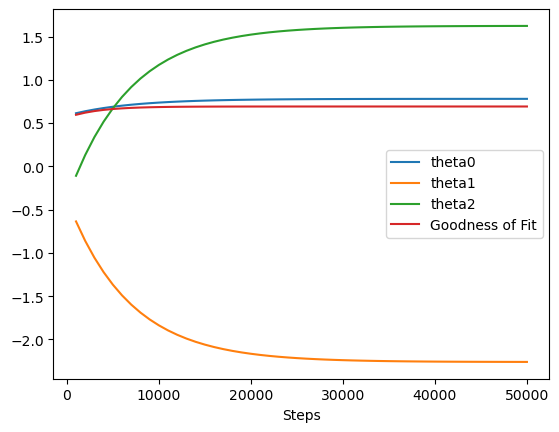

In [16]:
#Code for generating outputs from various step numbers with constant eta. for quadratic_auto_dataframe   

def computationV2quadratic(featureListTargetDf, eta, step_gap, iterations):
    featureListPlusOne = featureListTargetDf['featureListPlusOne']
    numberOfFeaturesPlusOne = len(featureListPlusOne[0])
    thetaValues = [0]*numberOfFeaturesPlusOne
    thetasList = []
    iteration = 0
    step = 0
    while iteration < iterations:
        iteration_step_count = 0
        while iteration_step_count < step_gap:
            theta_iter = 0
            while theta_iter < numberOfFeaturesPlusOne:
                thetaValues[theta_iter] = thetaValues[theta_iter] - eta*calcDiff(featureListTargetDf, thetaValues, theta_iter)
                theta_iter = theta_iter+1
            step = step+1
            iteration_step_count = iteration_step_count+1
        result = thetaValues.copy()
        GOF = goodnessOfFit(quadratic_auto_dataframe ,result)
        result.append(eta)
        result.append(step)
        result.append(GOF)
        #print("theta values = \n")
        #print(thetaValues)
        thetasList.append(result)
        #print(thetasList)
        iteration = iteration+1
    thetas_d2_auto_df2 = pd.DataFrame(data=thetasList,columns=['theta0', 'theta1', 'theta2', 'ETA', 'Steps', 'Goodness of Fit'])
    print(thetas_d2_auto_df2)
    return(thetas_d2_auto_df2)

thetas_d2_auto_df2 = computationV2quadratic(quadratic_auto_dataframe , 0.1, 1000, 50)

thetas_d2_auto_df2.plot(x="Steps", y=["theta0" ,"theta1", "theta2", "Goodness of Fit" ])


[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251]]
[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251], [0.4996411391143851, -0.570235650940118, 0.1, 200, 0.4709561340818371]]
[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251], [0.4996411391143851, -0.570235650940118, 0.1, 200, 0.4709561340818371], [0.5212082947390703, -0.674138349294036, 0.1, 300, 0.4979428110825488]]
[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251], [0.4996411391143851, -0.570235650940118, 0.1, 200, 0.4709561340818371], [0.5212082947390703, -0.674138349294036, 0.1, 300, 0.4979428110825488], [0.5319094913565413, -0.7256928158876019, 0.1, 400, 0.5045867916573097]]
[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251], [0.4996411391143851, -0.570235650940118, 0.1, 200, 0.4709561340818371], [0.5212082947390703, -0.674138349294036, 0.1, 300, 0.4979428110825488], [0.5319094913565413, -0.7256928158876019, 0.1, 4

[[0.4561747662670213, -0.36083050259369265, 0.1, 100, 0.3613410129429251], [0.4996411391143851, -0.570235650940118, 0.1, 200, 0.4709561340818371], [0.5212082947390703, -0.674138349294036, 0.1, 300, 0.4979428110825488], [0.5319094913565413, -0.7256928158876019, 0.1, 400, 0.5045867916573097], [0.5372192137436094, -0.7512731238858958, 0.1, 500, 0.506222505379182], [0.5398537931122105, -0.7639655674416839, 0.1, 600, 0.5066252096540991], [0.5411610193555942, -0.7702633072276006, 0.1, 700, 0.5067243533678604], [0.5418096391966807, -0.7733881213137768, 0.1, 800, 0.5067487620384168], [0.5421314715500168, -0.7749385923407, 0.1, 900, 0.5067547713271122], [0.5422911584067747, -0.7757079054387054, 0.1, 1000, 0.5067562507829697], [0.5423703918708961, -0.7760896234021407, 0.1, 1100, 0.5067566150173659], [0.5424097059507407, -0.776279024315744, 0.1, 1200, 0.5067567046899935], [0.5424292128206113, -0.7763730013079484, 0.1, 1300, 0.5067567267669318], [0.5424388917441333, -0.776419630835207, 0.1, 1400, 

<Axes: xlabel='Steps'>

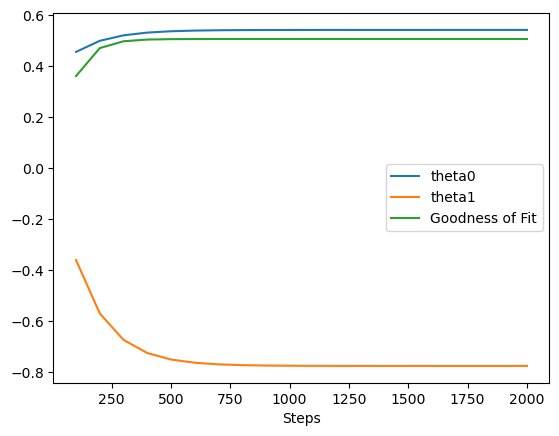

In [17]:
#Code for generating outputs from various step numbers with constant eta. for quadratic_auto2_dataframe   

def computationV2quadratic2(featureListTargetDf, eta, step_gap, iterations):
    featureListPlusOne = featureListTargetDf['featureListPlusOne']
    numberOfFeaturesPlusOne = len(featureListPlusOne[0])
    thetaValues = [0]*numberOfFeaturesPlusOne
    thetasList = []
    iteration = 0
    step = 0
    while iteration < iterations:
        iteration_step_count = 0
        while iteration_step_count < step_gap:
            theta_iter = 0
            while theta_iter < numberOfFeaturesPlusOne:
                thetaValues[theta_iter] = thetaValues[theta_iter] - eta*calcDiff(featureListTargetDf, thetaValues, theta_iter)
                theta_iter = theta_iter+1
            step = step+1
            iteration_step_count = iteration_step_count+1
        result = thetaValues.copy()
        GOF = goodnessOfFit(quadratic_auto2_dataframe ,result)
        result.append(eta)
        result.append(step)
        result.append(GOF)
        #print("theta values = \n")
        #print(thetaValues)
        thetasList.append(result)
        #print(thetasList)
        iteration = iteration+1
    thetas_d2_auto2_df2 = pd.DataFrame(data=thetasList,columns=['theta0', 'theta1', 'ETA', 'Steps', 'Goodness of Fit'])
    print(thetas_d2_auto2_df2)
    return(thetas_d2_auto2_df2)

thetas_d2_auto2_df2 = computationV2quadratic2(quadratic_auto2_dataframe , 0.1, 100, 20)

thetas_d2_auto2_df2.plot(x="Steps", y=["theta0" ,"theta1", "Goodness of Fit" ])


In [18]:
#generating thetas using SciKit Learn

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

X = quadratic_auto[['hp_normalized', 'hp2_normalized']].to_numpy()
y = quadratic_auto[['mpg_normalized']].to_numpy().ravel()

Model = SGDRegressor(eta0 = 0.1 , max_iter = 50000)

Model.fit(X,y)

theta_sk_0 = Model.intercept_[0]
theta_sk_1, theta_sk_2 = Model.coef_

sklearn_theta_model = [theta_sk_0, theta_sk_1, theta_sk_2]

print(sklearn_theta_model)

#fitnes
y_pred = Model.predict(X)

r2 = r2_score(y, y_pred)

print(r2)

[0.5843666463245404, -0.44074018514136054, -0.3164349366931114]
0.5695548321830615


In [19]:
#computing theta final theta
final_theta_model = computationV2(quadratic_auto_dataframe,0.1,50000)

print(final_theta_model)

[0.780413399870864, -2.2599078105296773, 1.6231868589201275]


In [20]:
#processing data for plotting
quadratic_auto_training, quadratic_auto_testing

training_mpg_list = quadratic_auto_training[:,0].tolist()
training_hp_list = quadratic_auto_training[:,1].tolist()
training_hp2_list = quadratic_auto_training[:,2].tolist()

test_mpg_list = quadratic_auto_testing[:,0].tolist()
test_hp_list = quadratic_auto_testing[:,1].tolist()
test_hp2_list = quadratic_auto_testing[:,2].tolist()

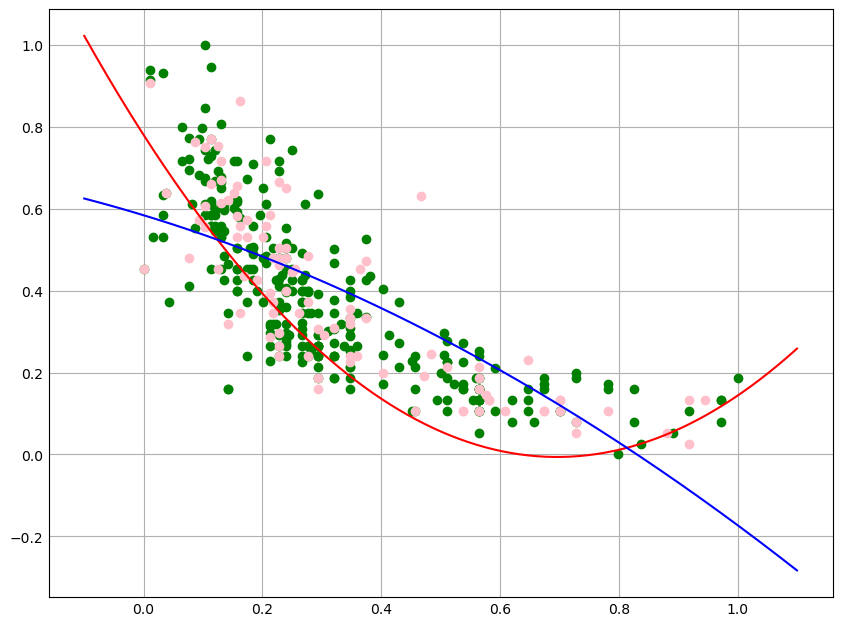

In [21]:
#final plot
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots() 
fig.set_size_inches(8,6)


#ax.scatter(list(quadratic_auto['hp_normalized']) , list(quadratic_auto['mpg_normalized']), label = 'data point', color = 'green')
ax.scatter(training_hp_list , training_mpg_list, label = 'data point', color = 'green')
ax.scatter(test_hp_list , test_mpg_list, label = 'data point', color = 'pink')

#model visualization
x_values = np.linspace(-0.1, 1.1, 250)
y_values = final_theta_model[2] * (x_values**2) + final_theta_model[1] * x_values + final_theta_model[0]
y_sklearn_values = (theta_sk_2 * (x_values**2)) + (theta_sk_1 * x_values) + theta_sk_0

ax.plot(x_values, y_values, label='calculated regression line', color='red' )

ax.plot(x_values, y_sklearn_values, label='validation line', color='blue' )

In [23]:
#Validating model with testing data and calculating absolute difference of predicted and observed target values
mpg_predicted = [final_theta_model[2] * (xi**2) + final_theta_model[1] * xi + final_theta_model[0] for xi in test_hp_list]

analysis_df = pd.DataFrame({
    'hp': test_hp_list,
    'mpg_predicted': mpg_predicted,
    'mpg_observed': test_mpg_list,
    'abs_diff': [abs(y_obs - y_calc) for y_obs, y_calc in zip(test_mpg_list, mpg_predicted)]
})

mean_abs_diff = analysis_df['abs_diff'].mean()

print(analysis_df)
print(mean_abs_diff)

          hp  mpg_predicted  mpg_observed  abs_diff
0   0.347826       0.190737      0.319149  0.128412
1   0.701087      -0.006145      0.106383  0.112528
2   0.364130       0.172732      0.452128  0.279396
3   0.157609       0.464553      0.582447  0.117894
4   0.130435       0.513258      0.614362  0.101103
..       ...            ...           ...       ...
93  0.293478       0.256984      0.186170  0.070814
94  0.228261       0.349138      0.239362  0.109776
95  0.673913      -0.005383      0.106383  0.111766
96  0.076087       0.617861      0.478723  0.139137
97  0.103261       0.564361      0.750000  0.185639

[98 rows x 4 columns]
0.12822942657105327
